# **Plotting the variation of temperature of a heated rod by applying Finite Difference Formula on the Heat Equation**

dt =  4.5e-05


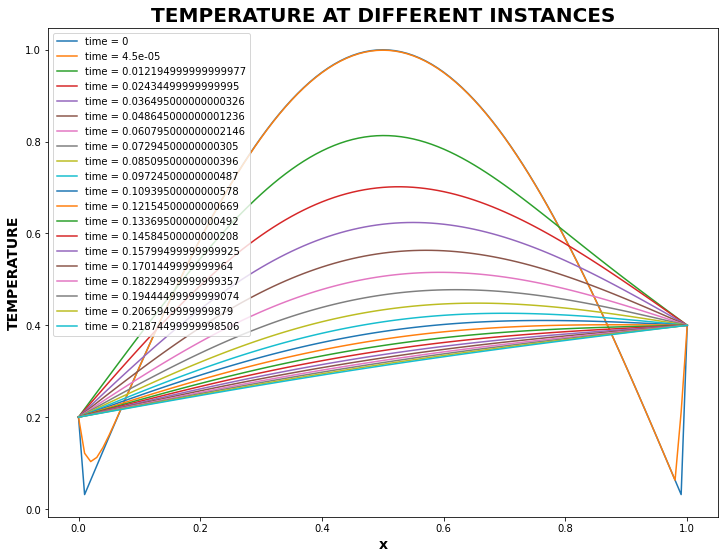

In [9]:
import matplotlib.pyplot as plt  ##importing libraries
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


N = 100 ## Actually  total points wil be N+1

x = np.linspace(0,1,N+1) ## x array 
dx = x[2]-x[1] ## delta  x
Temp = np.sin(x*np.pi)  ##temperature array
Stack_array = Temp ## It will be used for 3d plot

##fixing end points temperature
T1 = .2
T2 = .4

##changing end points value in temperature array
Temp[0] = T1
Temp[N]  = T2


eta = 0.45
dt = eta*dx*dx
print('dt = ',dt)
t = 0 ##initial time


fig = plt.figure(figsize = (12,9))  ##creating figure


plt.xlabel('x',fontsize='14',fontweight='bold')
plt.ylabel('TEMPERATURE',fontsize='14',fontweight='bold')
plt.title('TEMPERATURE AT DIFFERENT INSTANCES',fontsize='20',fontweight='bold')
plt.plot(x,Temp,label ="time = "+str(0) ) ##plotting temperature vs x


## calculating temperature as time evolves
for i in range(5000):
    for j in range(1,N):
        Temp[j] = Temp[j] +eta*(Temp[j+1]+Temp[j-1]-2*Temp[j]) ##populating temperature array
    t += dt 
    if(i%270==0): ##cuz we don't need to plot at every instant, only after 250 iter it will plot and store
        
        Stack_array = np.vstack((Stack_array,Temp)) ##i  will be using this arrayin next cell
        plt.plot(x,Temp,label ="time = "+str(t) ) ##plotting 
plt.legend() ##it will show time to
plt.show()

### **It can also be visualized in 3D**
The best way to plot the heat equation is in 3D. where we take one axis to be x  , second to be time and in third axis we show our Temperature..

I stored temperature as a row vector in stack_array in last cell. so now  I will  create a $2*2$ lattice that has a same shape as Stack_array 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


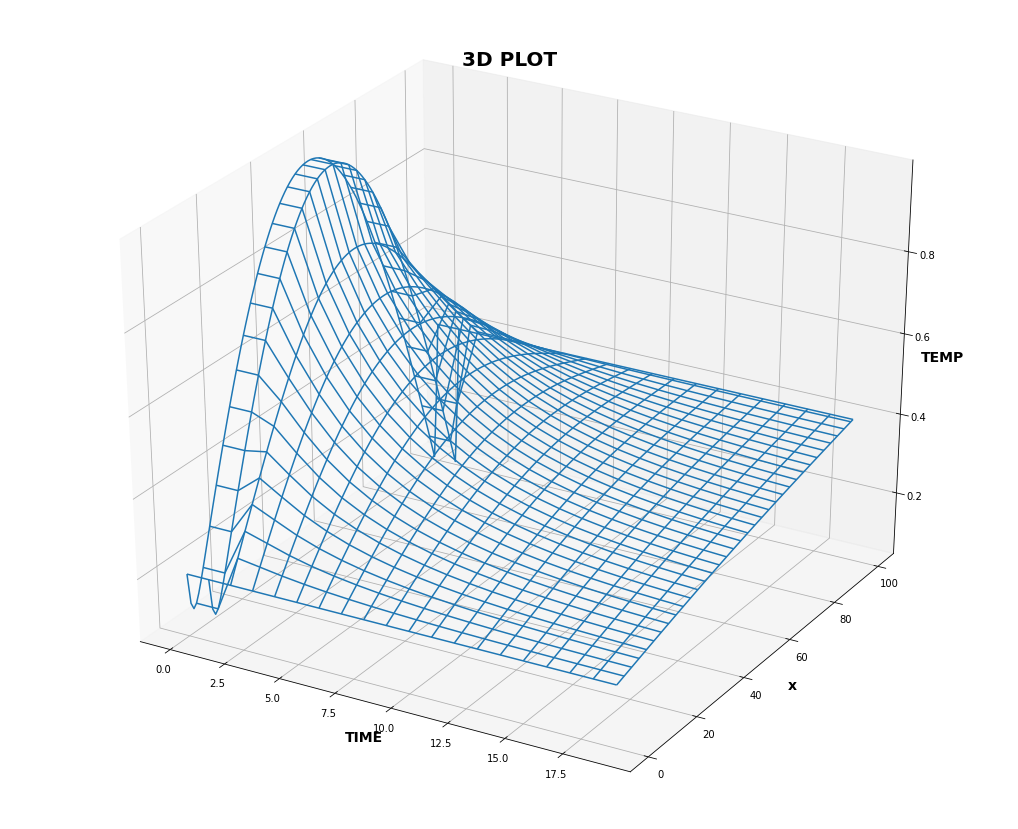

In [10]:
n_rows = int(Stack_array.shape[0])  ##finding columns of Stack_array
n_cols = int(Stack_array.shape[1])   ##finding rows of Stack_array

## Since we have to index stack array so we have to crte a mesh therefore these X Y will have integer value only
x1 = np.arange(0,n_rows) 
y1 = np.arange(0,n_cols)
X,Y = np.meshgrid(x1,y1)


def f2():
    z = Stack_array[X,Y]  ##defining Z value i.e. Temperature for time and space grid
    return z;
Z = f2()

fig = plt.figure(figsize = (18,15))
ax = plt.axes( projection='3d')
ax.plot_wireframe(X,Y,Z)
ax.set_xlabel('TIME',fontsize='14',fontweight='bold')
ax.set_ylabel('x',fontsize='14',fontweight='bold')
ax.set_title('3D PLOT',fontsize='20',fontweight='bold')

ax.set_zlabel('TEMP',fontsize='14',fontweight='bold')
plt.show()
